# Introduction to Coding (in Python)
## Lesson 7 - Functions

### Functions

With Matplotlib and NumPy at our disposal, we can do a lot of science! Functions allow us to take that to the next level, organizing our code and enabling more complex calculations.

A function is the coding extrapolation of a mathematical concept. Take $\sin(x)$ for example. This is a function, which takes an argument, $x$, and spits out a new value. A function in code takes input, does stuff, and gives an output. Remeber the Gaussian, or normal, distribution from the last lesson:

$$P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-1}{\sigma^2}\left(x - \mu \right)^2 } $$


Let's make a function for it!

To make a function, we use the command `def FUNCTION_NAME():`. Then, in the parentheses, we can include the variables the function will get to work with. For example, if I want to do something with a number `x`, then my function would look like `def function(x):`. 

We can also have optional/default parameters. For the gaussian distribution, I will have $\mu = 0$ and $\sigma=1$ as default parameters.

**Example 1**

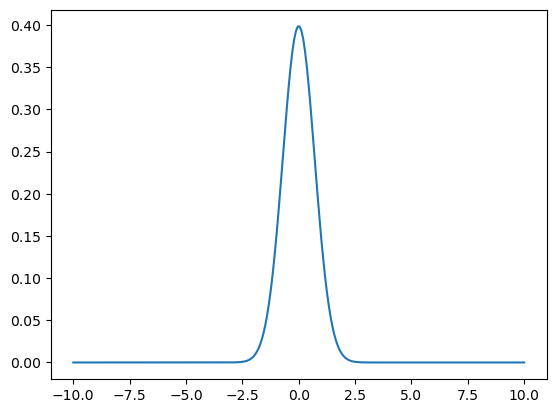

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x,mu=0,sigma=1):
    probability_Dist = 1.0/(np.sqrt(2*np.pi*sigma**2))*np.exp(-1/sigma**2 * (x - mu)**2)
    return probability_Dist #Tell what the output of the function is!

xLst = np.linspace(-10,10,250)
plt.plot(xLst,gaussian(xLst)) #It is a lot simpler to plot a gaussian distribution now!

Notice I passed an ARRAY of numbers to the `gaussian` function. And it still worked! Be carful that you know what your function takes in as parameters. For example, what if I want to plot the gaussian for both $\mu = 0$ and $\mu = 1$? I'll need a different function, because I get an error:

In [18]:
gaussian(xLst,mu=[0,1])

ValueError: operands could not be broadcast together with shapes (250,) (2,) 

Or, if I still want to use the function, I could use a loop:

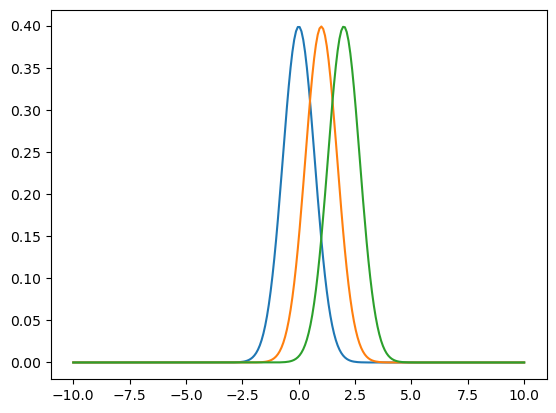

In [19]:
muLst = [0,1,2]
for mu in muLst:
    plt.plot(xLst,gaussian(xLst,mu=mu))

With functional programming (using functions in code), the choices we have as coders become apparent. There is never just one way to solve a problem. 

In fact, even when your algorithm is good or your function works, you can run into errors when combining them! Coding is about finding a solution and changing the code so it gives you the result you want. 

>**Problem 1**\
Make a new function (which can have loops inside of it) that returns gaussian distributions for a list of `mu` values. Add it at the start of the code block below, and it will try to plot your code! 

ValueError: x and y must have same first dimension, but have shapes (250,) and (1,)

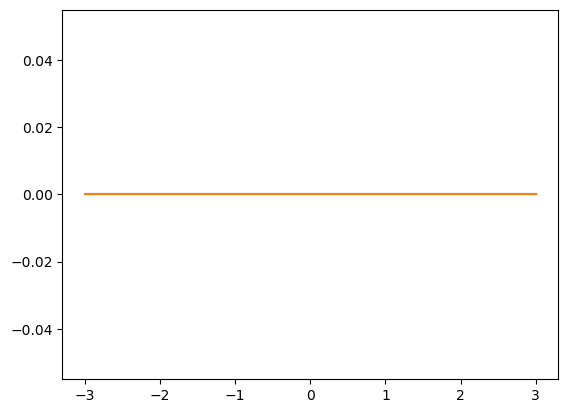

In [29]:
def yourGaussian(x,mu=[0,0],sigma=1):
    ##Write your code here

    return [0*x,0*x,...] 
    #(the above list should match the length of the mu list, and each entry should have the same length as x)

muLst = [-1,0,1]
xLst = np.linspace(-3,3,250)

distsToPlot = yourGaussian(xLst,mu = muLst)
for dist in distsToPlot:
    plt.plot(xLst,dist)

### Solving a Differential Equation

Maybe you've seen a ball fly through the air, arcing downward to hit the ground. This is, of course, gravity at work!

If we look at Newton's second law, we see that the acceleration of a mass is related to the force on that mass:

$$ \vec{F} = m \vec{a} $$

With gravity only acting in the vertical direction $\hat{z}$, the equation is 

$$ \vec{a} = \frac{1}{m} F_g \hat{z} $$

Splitting the vector form of the equation, we see that there is no acceleration in the $\hat{x}$ and $\hat{y}$ horizontal directions: 

$$ a_x = 0 $$ 

$$ a_y = 0 $$ 

$$ a_z = \frac{1}{m} F_g $$ 

Acceleration is the derivative of velocity. So, we get 

$$ \frac{d v_x}{dt} = 0 $$ 

$$ \frac{d v_y}{dt}  = 0 $$ 

$$ \frac{d v_z}{dt} = \frac{1}{m} F_g $$ 

Integrating from time $t=0$ to some later time, we find

$$ v_x(t) = v_x(t=0) $$ 

$$ v_y(t) = v_y(t=0) $$ 

$$ v_z(t) = v_z(t=0) + \frac{1}{m} F_g t $$ 

where we have assumed that $F_g$ and $m$ are constant in time. That assumption is pretty good for studying a ball flying through the air to a basket or a goal. 

Since velocity is the time derivative of position, we can integrate again and find the $x$, $y$, and $z$ positions of the ball through time:

$$ x(t) = x(t=0) + v_x(t=0) t $$ 

$$ y(t) = y(t=0) + v_y(t=0) t $$ 

$$ z(t) =  z(t=0) + v_z(t=0)t + \frac{1}{2m} F_g t^2 $$ 

So, as long as we know the initial position $\vec{x}(t=0) = \langle x(t=0), y(t=0), z(t=0) \rangle = \langle x_0, y_0, z_0\rangle $ and the initial velocity $\vec{v}(t=0) = \langle v_x(t=0), v_y(t=0), v_z(t=0) \rangle = \langle v_{x0}, v_{y0}, v_{z0}\rangle $ of an object, we know where it will go!

For Earth's gravity, we know the force is directed downward with acceleration $g = 9.8 \,\mathrm{m} \, \mathrm{s}^{-1}$. This gives $F_g = - m g$ in our above notation. Putting all this together, the position of a ball is 

$$ x(t) = x_0 + v_{x0} t $$ 

$$ y(t) = y_0 + v_{y0} t $$ 

$$ z(t) =  z_0 + v_{z0} t - \frac{1}{2} g t^2 $$ 

There! We solved a differential equation! As a result, we know where a ball will go! 

Except, we know there are other forces (like air resistance) which change the arc of a ball through the air. How do we solve the problem in that case?

### Harder differential equations

Going back to Newton's second law, we see that in general, the force could be a function of space, velocity, and time:

$$ \frac{d \vec{v}}{dt} = \frac{1}{m} \vec{F}(\vec{x},\vec{v},t)$$

Space and time seem obvious. A ball flying through the air could run into a wall and feel a new force at a different spot in space. Or, a breeze could come by at a later time and hit the ball. But what is with the dependence on object velocity? That dependence allows us to include air resistance. The faster an object travels, the more air resistance it feels. Drag forces take the form 

$$ \vec{F}_\mathrm{drag} = - b v^{n} \hat{v} $$

where $\hat{v} = \vec{v} / v$ is the unit vector in the direction of the velocity, $b$ is a drag coefficient, $v$ is the speed (the magnitude of the velocity vector), and $n$ is determined by the type of drag. Turbulent drag generally has $n=2$ and laminar drag has $n=1$. The point is, the force is pointed in the exact opposite of the direction of motion and depends on the object's speed. 

Including these complicated forces means we might not be able to solve the differential equation with a direct integration. But, we will likely be able to solve it using numerical integration! 

Let's assume we know the force on the object, i.e. we know the functional form of $ \vec{F}(\vec{x},\vec{v},t)$. How do we solve the problem? We can integrate from a time $t$ to a time $t + \Delta t$, just a little later,  and get  

$$ \int_{t}^{t + \Delta t} \frac{d \vec{v}}{dt} dt = \frac{1}{m} \int_{t}^{t + \Delta t} \vec{F}(\vec{x},\vec{v},t) dt $$

$$\vec{v}(t+\Delta t) - \vec{v}(t)  = \frac{1}{m} \int_{t}^{t + \Delta t} \vec{F}(\vec{x},\vec{v},t) dt $$

What if during this time, the force $\vec{F}$ was constant? Then the problem gets much simpler: 


$$\vec{v}(t+\Delta t) - \vec{v}(t)  = \frac{1}{m} \vec{F}(\vec{x},\vec{v},t)\left( t+\Delta t - t \right)  $$

$$\vec{v}(t+\Delta t) - \vec{v}(t)  = \frac{1}{m} \vec{F}(\vec{x},\vec{v},t) \Delta t  $$

Then, we keep doing this, for many $\Delta t$, over and over, reusing what we get from the previous calculation. That takes us from $\vec{v}(t)$ to some other time $t + N \Delta t$. Computers are really good at doing a simple calculation thousands of times. 

>**Problem 2**\
Use numerical integration, as described above, to solve a one dimensional problem of a ball rising and falling after being launched upward at $v_{z0} = 98 \, \mathrm{m}\, \mathrm{s}^{-1}$. You need to numerically integrate the equation\
\
$$ \frac{d v_z}{dt} = -g $$ \
\
until $v_z=0$. That time corresponds to how long it takes the ball to reach its peak height. From the previous solution, we know this should be equal to \
\
$$ v_z(t_\mathrm{peak}) = v_{z0}-g t_\mathrm{peak} = 0 $$ \
\
$$ t_\mathrm{peak} = \frac{v_{z0}}{g} = 10 \, \mathrm{s}$$ 


For the next problem, let's step it up and solve the 2D problem of a ball with air resistance. We will just keep the $\hat{y}$ and $\hat{z}$ directions. In this case, we have four coupled equations we want to solve:

$$ \frac{dy}{dt} = v_y(t) $$

$$ \frac{dz}{dt} = v_z(t) $$

$$ \frac{dv_y}{dt} = \frac{1}{m} F_y(v_y,v_z, t)$$

$$ \frac{dv_z}{dt} = \frac{1}{m} F_z(v_y,v_z, t)$$

where our force function is 

$$ \vec{F} = -b \vec{v} - m g \hat{z} $$ 

$$ F_y = -b v_y $$ 

$$ F_z = -b v_z - m g $$ 

Plugging these in, the differential equations are 

$$ \frac{dy}{dt} = v_y $$

$$ \frac{dz}{dt} = v_z $$

$$ \frac{dv_y}{dt} = - \frac{b}{m} v_y $$

$$ \frac{dv_z}{dt} =  - \frac{b}{m} v_y  - g $$

In [30]:
def derivative(y,z,v_y,v_z):
    b = 0.3
    m = 1.0
    g = 9.8
    return v_y, v_z, -b/m*v_y, -b/m*v_z - g

y_0 = 0
z_0 = 0
v_z0 = 1
v_y0 = 1

dt = 0.001

dy, dz, dv_y, dv_z = derivative(y_0,z_0,v_y0,v_z0)
print(y_0 + dy*dt, z_0 + dz*dt, v_y0 + dv_y*dt, v_z0 + dv_z*dt)


0.001 0.001 0.9997 0.9899


>**Problem 2**\
In the above cell, I have set up the problem for you. The `derivative` function takes in all the particles position and velocity and returns the velocity and acceleration of the particle. Write a function which takes in starting positions and integrates forward by `N` steps in time, where each step is `dt=0.001` seconds. \
If you just run your function for `N=1`, then you should get the same results as the above code block. However, yours needs to be able to run for more than one time step!

In [ ]:
def integrate(N,dt=0.001):
    ### Figure out what needs to go here!
    return y, z, v_y, v_z
